In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import socket as socket
import os as os
import sys as sys
import itertools as it
import multiprocessing as mp

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("bionc"):
    print("Leipzig Cluster detected!")
    path = "/mnt/archgen/users/hringbauer/git/IBD-Analysis/ibd_analysis/blocksim/"
    sys.path.insert(0, path) # Work in blocksim  Path
os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd()) 
print("CPU Count: %d" % mp.cpu_count())

from multi_run_hetero import cluster_run, MultiRunHetero
from figs_multi_hetero import plot_estimates_scenarios

bionc21
Leipzig Cluster detected!
/mnt/archgen/users/hringbauer/git/IBD-Analysis/ibd_analysis/blocksim
CPU Count: 40


# 1) Run IBD Simulations and Inference

### 1a) Test single sim+inference run when running multiple Scenarios
With fixed beta=0 takes about 10 min

In [ ]:
%%time

sigmas = [[0.8, 0.4], [0.4, 0.8], [0.5, 0.5], [0.5, 0.5], [0.4, 0.8], [0.4, 0.8], [0.4, 0.8], [0.4, 0.8], [0.8, 0.8]]
nr_inds = [[500, 1000], [1000, 500], [40, 20], [2000, 1000], [40, 20], [1500, 1000], [20, 40], [100, 200], [100, 100]]
betas = [1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.5, 0.5]
position_list = [[100 + i, 100 + j] for i in xrange(-10, 11, 4) for j in xrange(-6, 7, 4)]

start_params = [50, 50, 0.4, 0.6]

cluster_run(data_set_nr=42, folder_out="./output/test/", replicates=20, simtype='classic', 
            sigmas=sigmas, nr_inds=nr_inds, betas=betas, 
            position_list=position_list, sample_size=10, start_params=start_params)

# 1b) Run multiple scenarios on Cluster
Also check out `run_fixNe1.py` in cluster folder

In [12]:
!rm /mnt/archgen/users/hringbauer/git/IBD-Analysis/ibd_analysis/blocksim/cluster/log/*

In [13]:
!cat /mnt/archgen/users/hringbauer/git/IBD-Analysis/ibd_analysis/blocksim/cluster/run.qsub

#!/bin/bash
### These commands set up the Grid Environment for your job:
#$ -l h_rt=01:00:00  ### Format HH:MM:SS
#$ -l h_vmem=12g  # Hard Memory Limit
#$ -pe smp 1
#$ -N IBD-Sim
#$ -o log/$JOB_ID.$TASK_ID.out  # Custom Output File
#$ -e log/$JOB_ID.$TASK_ID.err  # Custom Error File
#$ -t 1-225:1 # Gets -1 in python script
#$ -cwd
#$ -S /bin/bash #defines bash as the shell for execution
#$ -V   # Loads all user environment variables and shell functions

### Any extra code follows here (e.g. setting directorys)

echo Running Task $SGE_TASK_ID ### Print some output
### python2 run_fixNe.py $SGE_TASK_ID  ### Run the job with Python2
python2 run_varyNe.py $SGE_TASK_ID  ### Run the job with Python2
echo Simulation Finished!

In [15]:
!cd /mnt/archgen/users/hringbauer/git/IBD-Analysis/ibd_analysis/blocksim/cluster/; qsub ./run.qsub  ### Submit Job

Your job-array 8899038.1-225:1 ("IBD-Sim") has been submitted


In [28]:
!qstat -u harald_ringbauer #| wc -l ### Check what jobs are running

In [ ]:
!cat /mnt/archgen/users/hringbauer/git/IBD-Analysis/ibd_analysis/blocksim/cluster/log/

In [ ]:
!qdel 8899036 

# 2) Plot figures from IBD simulation results (multiple scenarios)

In [2]:
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Makes background for jupyter lab plotting white

## 2a) Plot fixed Ne simulations

(100, 4, 2)
Saved figure to: ./output/figs/fixed_beta.pdf


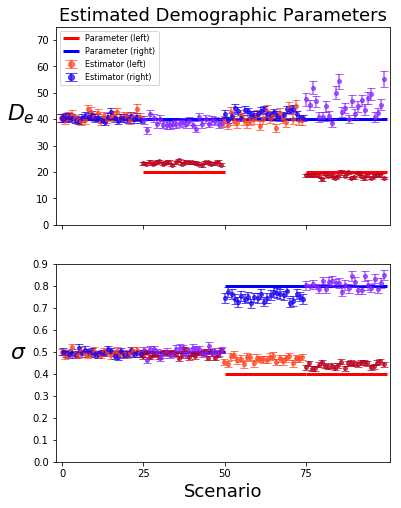

In [4]:
sigmas = [[0.5, 0.5], [0.5, 0.5],  [0.4, 0.8], [0.4, 0.8]]
nr_inds = [[40, 40], [20, 40], [40, 40], [20, 40]]
betas = [0.0, 0.0, 0.0, 0.0]

plot_estimates_scenarios(folder="./output/fixNe/", scenario_nr=4, replicate_nr=25, yscale_D="linear", lw=3,
                         beta_fix=True, figsize=(6, 8), leg_loc='upper left', ylim_D=[0, 75], ylim_sigma=[0,0.9], ms=4, cs=4,
                         savepath="./output/figs/fixed_beta.pdf",
                         sigmas=sigmas, nr_inds=nr_inds, betas=betas, title="Estimated Demographic Parameters")

(225, 5, 2)
Saved figure to: ./output/figs/vary_beta.pdf


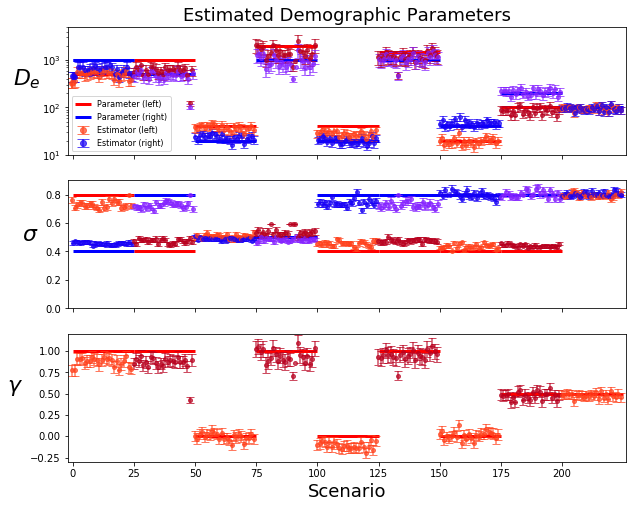

In [32]:
sigmas = [[0.8, 0.4], [0.4, 0.8], [0.5, 0.5], [0.5, 0.5], [0.4, 0.8], [0.4, 0.8], [0.4, 0.8], [0.4, 0.8], [0.8, 0.8]]
nr_inds = [[500, 1000], [1000, 500], [40, 20], [2000, 1000], [40, 20], [1500, 1000], [20, 40], [100, 200], [100, 100]]
betas = [1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.5, 0.5]

plot_estimates_scenarios(folder="./output/varyNe/", scenario_nr=9, replicate_nr=25, yscale_D="log", lw=3,
                         beta_fix=False, figsize=(10, 8), leg_loc='lower left', 
                         ylim_D=[10, 5000], ylim_sigma=[0,0.9], ms=4, cs=4,
                         savepath="./output/figs/vary_beta.pdf",
                         sigmas=sigmas, nr_inds=nr_inds, betas=betas, title="Estimated Demographic Parameters")

## Legacy Code
Plotting will not work anymore as now data is saved in tab-seprated tsvs (instead of $)

### 2a) Plot Symmetric Scenarios

(120, 5, 2)


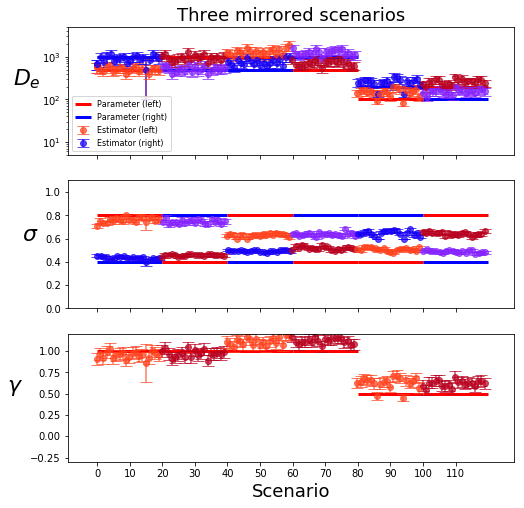

In [19]:
# Plots the reflected Scenarios
sigmas = [[0.8, 0.4], [0.4, 0.8], [0.8, 0.4], [0.4, 0.8], [0.4, 0.8], [0.8, 0.4]]
nr_inds = [[500, 1000], [1000, 500], [1000, 500], [500, 1000], [100, 200],[200, 100]]
betas = [1.0, 1.0, 1.0, 1.0, 0.5, 0.5]


plot_eight_scenarios(folder="./hetero_runs_symmetric", scenario_nr=6, 
                     sigmas=sigmas, nr_inds=nr_inds, betas=betas, title="Three mirrored scenarios")

### 2b) Plot Hetero Runs

(180, 5, 2)


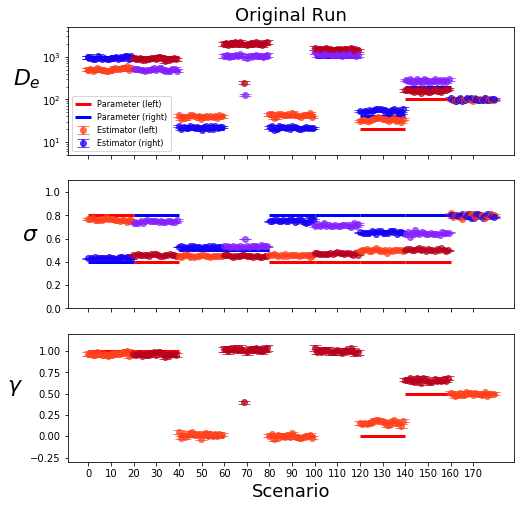

In [20]:
sigmas = [[0.8, 0.4], [0.4, 0.8], [0.5, 0.5], [0.5, 0.5], [0.4, 0.8], [0.4, 0.8], [0.4, 0.8], [0.4, 0.8], [0.8, 0.8]]
nr_inds = [[500, 1000], [1000, 500], [40, 20], [2000, 1000], [40, 20], [1500, 1000], [20, 40], [100, 200], [100, 100]]
betas = [1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.5, 0.5]
plot_eight_scenarios(folder="./hetero_runs1", sigmas=sigmas, nr_inds=nr_inds, betas=betas, title="Original Run")             # Plots eight Scenarios.

# 2c) Hetero Runs Isotropic

(120, 5, 2)


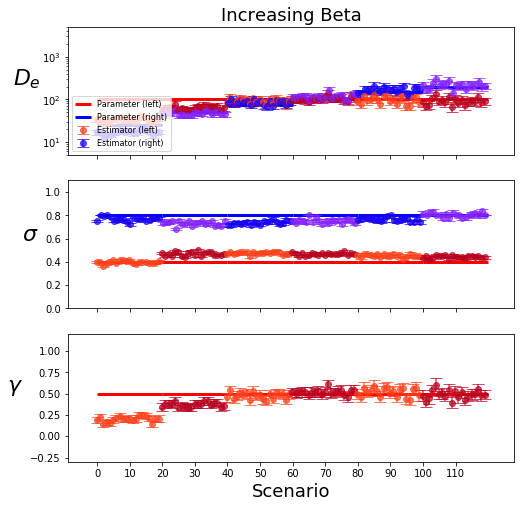

In [21]:
nr_inds = [[100, int(i * 100)] for i in [0.25, 0.5, 0.75, 1, 1.5, 2]]
sigmas = [[0.4, 0.8] for _ in xrange(6)]
betas = [0.5 for _ in xrange(6)]
plot_eight_scenarios(folder="./hetero_runs_var_beta", scenario_nr=6, sigmas=sigmas, nr_inds=nr_inds, betas=betas, title="Increasing Beta")

# Area 51